# Data Preprocessing 
- Total All Regions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

In [3]:
df = pd.read_csv('data\kr_daily.csv')

In [4]:
df = df.drop(['date', 'death', 'released', 'tested', 'negative', 'critical'], axis=1)

In [5]:
def make_diff(dataframe):
    
    df_list = dataframe['confirmed'].tolist()
    diff = []

    for i in range(len(df_list)):
        if i != 0:
            diff.append(df_list[i] - df_list[i - 1])

    sub = [1]
    diff = sub + diff

    diff = pd.DataFrame(diff, columns=['confirmed'])

    return diff

In [6]:
make_diff(df)

,confirmed
0,1
1,0
2,0
3,1
4,0
...,...
488,585
489,538
490,516
491,707


In [7]:
def diff_level(dataframe, level):

    model = dataframe

    for i in range(level):
        model = make_diff(model)

    return model

In [8]:
diff_level(df, 1)

,confirmed
0,1
1,0
2,0
3,1
4,0
...,...
488,585
489,538
490,516
491,707


In [9]:
diff_level(df, 2)

,confirmed
0,1
1,-1
2,0
3,1
4,-1
...,...
488,-81
489,-47
490,-22
491,191


## Plot

In [13]:
cumulative = diff_level(df, 0)
daily_confirmed = diff_level(df, 1)
diff_1 = diff_level(df, 2)
diff_10 = diff_level(df, 11)
diff_50 = diff_level(df, 51)
diff_100 = diff_level(df, 101)

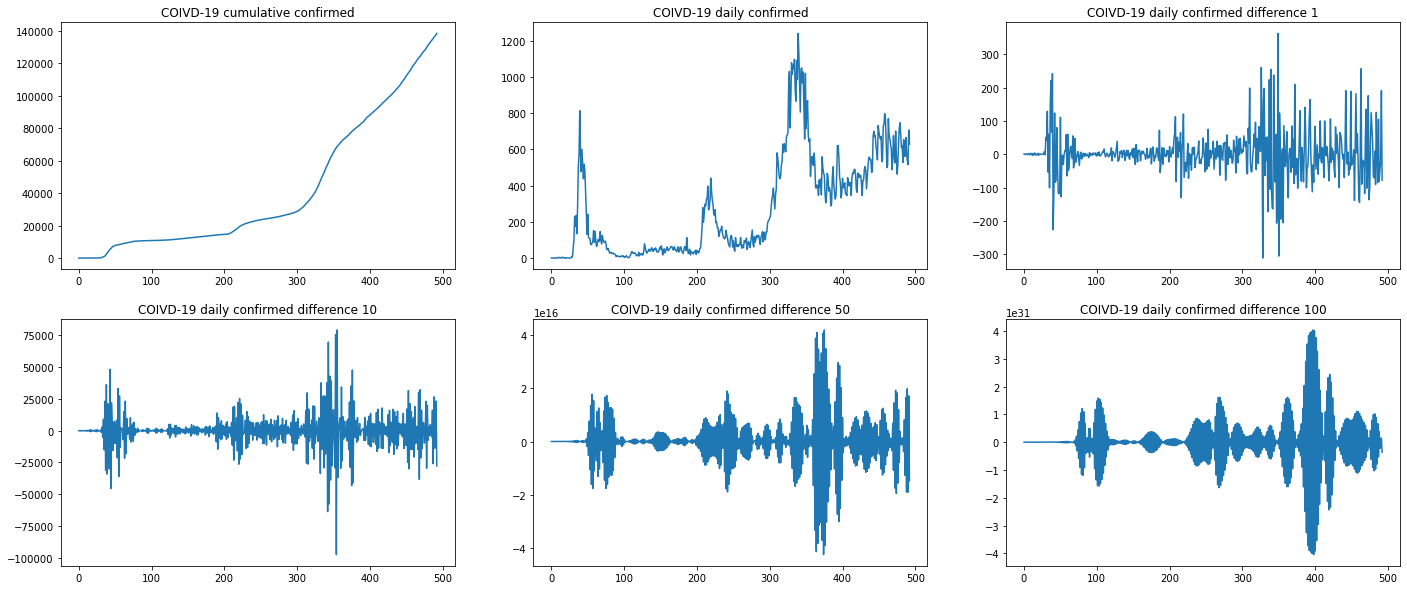

In [15]:
plt.figure(figsize = (24, 10))
plt.subplot(231)
plt.title('COIVD-19 cumulative confirmed')
plt.plot(np.arange(len(cumulative)), cumulative)

plt.subplot(232)
plt.title('COIVD-19 daily confirmed')
plt.plot(np.arange(len(daily_confirmed)), daily_confirmed)

plt.subplot(233)
plt.title('COIVD-19 daily confirmed difference 1')
plt.plot(np.arange(len(diff_1)), diff_1)

plt.subplot(234)
plt.title('COIVD-19 daily confirmed difference 10')
plt.plot(np.arange(len(diff_10)), diff_10)

plt.subplot(235)
plt.title('COIVD-19 daily confirmed difference 50')
plt.plot(np.arange(len(diff_50)), diff_50)

plt.subplot(236)
plt.title('COIVD-19 daily confirmed difference 100')
plt.plot(np.arange(len(diff_100)), diff_100)
plt.show()